Άρης Τσιλιφώνης 1115201700170

In [1]:
import sys
!{sys.executable} -m pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



In [2]:
pip install imageio

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



In [3]:
import sys  
!{sys.executable} -m pip install --user matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
import imageio
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

directory exists
number of images : 30
length of each vector : 30000
[[ -2339.43115872   2109.86407839  -9783.66889123 -10596.8096538
   -3009.28611074  -8045.5886264   -1321.60554433  -1654.75878143
   -5304.41849679    867.62131412 -10197.50081363  -5154.75057887
   -3492.59435463  -7435.993963      338.85115334  -6201.78086027
   -4426.63872613 -10548.02550291  -5019.51707983  -7039.23162772
    9797.70159124   9437.62825726  10768.5745346    5999.18023737
    8697.64257876  11489.97251057   9779.8878631   14099.99527809
    4889.45069939  13295.23067422]
 [ -2185.85391892  -8181.99397157   1873.33390635   1083.94448537
    9157.61245376  -3226.31013118  -1564.15225872  -3522.14608006
    2549.53287102   1468.84869328   1487.34451097   3506.23223324
   -4418.50219911   1351.48265467  -6540.2013282   -1042.92786877
    -767.22103897  -1020.43709899   3172.97444075   1768.34684573
    -735.99107413  -3249.05053633   1761.13301414  -1574.31639922
    2585.19435528   3771.80029829   -75

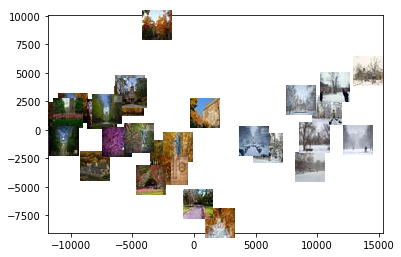

In [13]:
PATH = r'C:\Users\user\Documents\ML\images\\'#folder with images
PATH2 = r'C:\Users\user\Documents\ML\resized2'#folder that will contain images fit for plot

def loadImages(path):
    Copy_to_path = r'C:\Users\user\Documents\ML\resized\\'#folder that will contain images with 100x100 size
    resized_path = r'C:\Users\user\Documents\ML\resized' 
    imgs = []
    labels = []
    # Create the directory 
    try: 
        os.mkdir(resized_path) 
    except OSError as error: 
        print("directory exists") 

    for filename in os.listdir(path):
        img = Image.open(os.path.join(path, filename)) #images are color images
        #img.show()
        img = img.resize((100,100), Image.ANTIALIAS)
        img.save(Copy_to_path+filename)
        img1 = imageio.imread(Copy_to_path+filename)
        y = list(img1.ravel())# create vector of image
        #print(y)
        imgs.append(y)
        if filename[0] == 'F':#create an array of labels for each image
            labels.append('1')
        elif filename[0] == "S":
            labels.append('2')
        elif filename[0] == "W":
            labels.append('0')
        
    print("number of images :",len(imgs))#debug

    return imgs,labels

def loadImages2(path):
    Copy_to_path = r'C:\Users\user\Documents\ML\resized2\\' #path for images destined for plot
    resized_path2=PATH2
    imgs = []
    # Create the directory 
    try: 
        os.mkdir(resized_path2) 
    except OSError as error: 
        print("directory exists") 

    for filename in os.listdir(path):
        img = Image.open(os.path.join(path, filename)) #images are color images
        #img.show()
        img = img.resize((30,30), Image.ANTIALIAS)#resize to fit
        img.save(Copy_to_path+filename)
        
def getpaths(path):
    path_array = []

    for filename in os.listdir(path):
        path_array.append(os.path.join(path, filename)) #make string that has the path for each image

    return path_array 

def getImage(path):
    return OffsetImage(plt.imread(path))

images,labels=loadImages(PATH)
i=0
#for i in range(len(images)):
#        print(images[i])

#for i in range(len(labels)):
#       print(labels[i])

print("length of each vector :",len(images[i]))

pca = PCA(n_components=2)
reduced = pca.fit_transform(images)#implement PCA for the array of vectors

t = reduced.transpose() #fit for plot
fig, ax = plt.subplots()
ax.scatter(t[0], t[1]) 
print(t)
loadImages2(PATH)
paths=getpaths(PATH2)#we need to correlate images with coordinates
#print(paths)

#create plot
for x0, y0, path in zip(t[0], t[1],paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.show()


2.1 Όταν οι εικόνες βρίσκονται πολύ κοντά στον δυσδιάστατο αυτό χώρο ,σημαίνει ότι έχουν παρόμοιες 2 πρώτες κύριες συνιστώσες.Οι κύριες συνιστώσες προκύπτουν από τα ιδιοδιανύσματα και τις ιδιοτιμές του array που περιέχει τα 1-D vector των εικόνων.Οι κύριες συνιστώστες αντιπροσωπεύουν τα κυριότερα χαρακτηριστικά των εικόνων.Όταν έχουν όμοια χαρατηριστικά (όμοια ζευγάρια PC1,PC2),αυτό σημαίνει ότι μοιάζουν πολύ.Θα μπορούσε να γενικευτεί και για μεγαλύτερου μεγέθους εικόνες.Ωστοσο επειδή το set από δεδομένα είναι μεγαλύτερο ενδεχομένως να χρειαστούν περισσότερες κύριες συνιστώστες για να έχουμε καλή ακρίβεια.

2.2 Γενικά γνωρίζουμε οτι δύο πρώτες κύριες συνιστώσες έχουν την μεγαλύτερη διασπορά δεδομένων(γραμμές με πιο πυκνά δεδομένα).Το νεο array που προκυπτεί θα περιέχει 30 στοιχεία με PC1,PC2 συντεταγμένες.Επειδή έχομουμε 30 εικόνες και 2 συνιστώσες προκύπτουν 2 ιδιοδύσματα με 30 τιμές. Αυτά τα ζευγάρια των τιμών αναπαριστούν την ομοιότητα των εικόνων.
 Οι εικόνες με κοινές εποχές έχουν πιο κοινά χρώματα ,άρα κοινές rgb τιμές.Αρα ολη η διαδικασία του PCA που γινεται στις στήλες του array(30x(10000x3)):means ,covariance ,eigenvectors/eigenvalues θα βγάζει παρόμοια αποτελέσματα στο τέλος.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
#print(images)
#print(labels)
#print(t)

# data are loaded at images,labels
# With original set #

X_train,x_test,Y_train,y_test = train_test_split(images,labels,test_size=0.3,random_state=209)
clsf = svm.SVC(kernel="linear")

#train the model

clsf.fit(X_train,Y_train)

#predict the response 
predict = clsf.predict(x_test) 
print("accuracy with initial images(SVM): ",metrics.accuracy_score(y_test,y_pred=predict)) 

accuracy with initial images(SVM):  0.7777777777777778


In [23]:
# With PCA set #
a = t[0]
b = t[1]
#print(a)
#print(b)
d = np.column_stack((a, b))#create pairs with 2 individual componets for each image
print(d)

# With PCA set #
X_train2,x_test2,Y_train2,y_test2 = train_test_split(d,labels,test_size=0.3,random_state=209)
clsf2 = svm.SVC(kernel="linear")
#train the model
clsf2.fit(X_train2,Y_train2)
#predict the response 
predict = clsf2.predict(x_test2) 
print("accuracy with PCA(SVM): ",metrics.accuracy_score(y_test2,y_pred=predict))

[[ -2339.43115872  -2185.85391892]
 [  2109.86407839  -8181.99397157]
 [ -9783.66889123   1873.33390635]
 [-10596.8096538    1083.94448537]
 [ -3009.28611074   9157.61245376]
 [ -8045.5886264   -3226.31013118]
 [ -1321.60554433  -1564.15225872]
 [ -1654.75878143  -3522.14608006]
 [ -5304.41849679   2549.53287102]
 [   867.62131412   1468.84869328]
 [-10197.50081363   1487.34451097]
 [ -5154.75057887   3506.23223324]
 [ -3492.59435463  -4418.50219911]
 [ -7435.993963     1351.48265467]
 [   338.85115334  -6540.2013282 ]
 [ -6201.78086027  -1042.92786877]
 [ -4426.63872613   -767.22103897]
 [-10548.02550291  -1020.43709899]
 [ -5019.51707983   3172.97444075]
 [ -7039.23162772   1768.34684573]
 [  9797.70159124   -735.99107413]
 [  9437.62825726  -3249.05053633]
 [ 10768.5745346    1761.13301414]
 [  5999.18023737  -1574.31639922]
 [  8697.64257876   2585.19435528]
 [ 11489.97251057   3771.80029829]
 [  9779.8878631    -751.03660849]
 [ 14099.99527809   5143.27197426]
 [  4889.45069939   

In [24]:
b=[]
#b=int(labels)
for i in labels:
    b.append(int(i))
print(b)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
c=[]
for p in b:
    c.append([p])
print(c)

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


In [26]:
#there i want to append the array of images with the array of labels
#and i do the preparation

#datasets
d1=[]#original images
d2=[]#pca
dataset=np.append(images, c, axis=-1)
dataset2=np.append(d, c, axis=-1)
print(dataset)
""" for i in dataset[0]:
    d1.append(int(i))"""
print(len(dataset)) 

for i in range(0,30):
    d1.append(list(dataset[i]))#original

for i in range(0,30):
    d2.append(list(dataset2[i]))#PCA
    #for j in range(0,len(dataset[i])
    """ for j in dataset[i]:
        d1.append(int(dataset[i][j])) """
print(d2[0])

#xd=list(dataset[0])
#print(xd) 

[[ 82  68   0 ...  72  33   1]
 [173 145 134 ...  92  12   1]
 [ 75  28  12 ...  23  10   1]
 ...
 [245 241 230 ... 232 221   0]
 [ 46  59  78 ...  30  66   0]
 [ 68  68  78 ... 224 236   0]]
30
[-2339.431158720459, -2185.8539189170897, 1.0]


' xd=list(dataset[0])\nprint(xd) '

In [27]:
import sys  
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



In [28]:
from random import randrange
from math import sqrt
#euclidean distance
def euclidean_distance(param1,param2):
    distance = 0.0
    for i in range(len(param1)-1):
        distance += (param1[i] - param2[i]) ** 2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)#compute distance
		distances.append((train_row, dist))#add tuple to the list
	distances.sort(key=lambda tup: tup[1])#sort them based on second key
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])#append the list of neighbours
	return neighbors

def classify(train_set,test_set_param,neighbors_num):
    neighbors = get_neighbors(train_set,test_set_param,neighbors_num)
    output_values = [row[-1] for row in neighbors]#result will be in last element of row
    predict = max(set(output_values),key=output_values.count)  if set(output_values) else None#make prediction based on most occurences
    return predict

def k_nearest_neighbours(train_set,test_set,neighbors_num):
    predictions = []
    for test_elem in test_set:
        result = classify(train_set,test_elem,neighbors_num)
        predictions.append(result)
    return predictions

 # Calculate accuracy %percent
def accuracy_metric(initial, predicted):
	correct = 0
	for i in range(len(initial)):
		if initial[i] == predicted[i]:
			correct += 1
	return correct / float(len(initial)) * 100.0

def cross_validation(data_set, folds_num):
	dataset_split_vector = [] 
	dataset2 = list(data_set)#create a list with the data
	fold_len = int(len(data_set) / folds_num)#fold length
	for i in range(folds_num):
		fold = [] #create fold
		while len(fold) < fold_len: #until we reach fold length 
			index = randrange(len(dataset2))#pick a random item
			fold.append(dataset2.pop(index))#add it to the fold
		dataset_split_vector.append(fold)#add fold to the vector of folds
	return dataset_split_vector

def algorithm_evaluation(data_set, algorithm, folds_num, *argv):
	folds = cross_validation(data_set, folds_num)
	scores = []
	for fold in folds:
		train_set = list(folds)#train set has the folds
		train_set.remove(fold)#remove one that will be used at the test set
		train_set = sum(train_set, [])#create a list of values with those vectors
		test_set = list()#list that will contain test
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None #initialize
		prediction = algorithm(train_set, test_set, *argv)#call algorithm
		true = [row[-1] for row in fold]#result will be in last position of vector
		accuracy = accuracy_metric(true, prediction)
		scores.append(accuracy)
	return scores

n_folds = 5
num_neighbors = 5

scores = algorithm_evaluation(d2, k_nearest_neighbours, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy (pca): %.3f%%' % (sum(scores)/float(len(scores)))) 

#prediction = classify(dataset, dataset[0], 3)
#print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Scores: [100.0, 66.66666666666666, 66.66666666666666, 33.33333333333333, 66.66666666666666]
Mean Accuracy (pca): 66.667%


In [29]:
scores = algorithm_evaluation(d1, k_nearest_neighbours, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy(pixelated image): %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [50.0, 66.66666666666666, 66.66666666666666, 83.33333333333334, 83.33333333333334]
Mean Accuracy(pixelated image): 70.000%


In [30]:
import pandas as pd
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.svm import SVC
import random

seed=10

X_train, X_test, y_train, y_test = train_test_split(d, labels, test_size=0.33, random_state=40)

kfold = KFold(n_splits=5, random_state=seed)

svm = SVC(kernel='poly')
scores = cross_val_score(svm, X_train, y_train,scoring='recall_macro', cv=kfold) #Cross validation on training set
print('Scores: %s' % scores)
print('Mean Accuracy(pixelated image): %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [0.75       1.         0.16666667 0.66666667 1.        ]
Mean Accuracy(pixelated image): 0.717%


In [31]:
seed=122

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=40)

kfold = KFold(n_splits=5, random_state=seed)

svm = SVC(kernel='poly')
scores = cross_val_score(svm, X_train, y_train,scoring='recall_macro', cv=kfold) #Cross validation on training set
print('Scores: %s' % scores)
print('Mean Accuracy(pixelated image): %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [0.5        1.         0.16666667 1.         0.55555556]
Mean Accuracy(pixelated image): 0.644%


3.1:Για την k-NN μέθοδο χρησιμοποιήθηκε η classification accuracy.Δηλαδή το κλάσμα (αριθμός σωστών προβλέψεων)/αριθμός συνολικών προβλέψεων
Για την SVM μέθοδο χρησιμοποιήθηκε η recall η οποία υπολογίζει ουσιαστικά των αριθμό των positive δειγμάτων , Δηλαδή
(true positive number)/(true positive number + false negative number)..Το macro σημαίνει ότι δεν λαμβάνει υποψη το label imbalance,κατι που δεν μας νοιαζει,γιατι εχουμε ισο αριθμο δειγματων για καθε κατηγορία. 
3.2:Χρησιμοποίησα 5-cross validation και ανεφερα μεση ακρίβεια τόσο για τα δεδομένα χαμηλής όσο και υψηλής διάστασης.
3.3:Μέσω της PCA εξάγουμε δυσδιάστατα δεδομένα(τυπου (α,β)).Δηλαδη αντιστοιχίζω κάθε συνιστώσα μία προς μια τιμή(α1,β1),(α2,β2)κοκ οπου α ,β οι διαστασεις PCA.
3.4:Βάση των αποτελεσμάτων καλύτερη μέθοδος για το πρόβλημα φαίνεται να είναι η K-NN για την υχηλή διάσταση και η SVM για την χαμηλή διάσταση.
Παρουσιάζονται βελτιωμένα score βάζοντας την παράμετρο polynomial στην Svm.

In [69]:
"""Non-negative Matrix Factorization (NMF).
Basic gradient descent (GD) implemented by the NMF_GD function
"""
"""
I follow residual approach computing the derivative of the norms in each step
"""
import numpy as np
import numpy.linalg as LA

def NMF_GD(X,steps = 70 ,inner_dim=6, lr=.0001, lam=.02, epsilon=.001):
    """Finds approximate non-negative factorization of M via constrained GD.
    Let M be an (m x n) matrix. Then M is factorized into W and H where W is an
    (m x inner_dim) matrix and H is an (inner_dim, n) matrix. 
   h to consider things equal.
   """
    x, n = X.shape
    W = np.random.uniform(size=(x, inner_dim))
    C = np.random.uniform(size=(inner_dim, n))
    accuracy = 10000
    accur=10000
    diff=10000
    #for i in range(steps):
    while(diff>epsilon):
        lr_ = lr - (i / steps * lr)#The learning rate, i.e. gradient descent step size. The learning
            #rate is linearly annealed to 0 over the course of training.
        dW, dC = penalized_gradient(X, W, C, lam)
        if (i>0):
             accur=LA.norm(X-np.dot(W,C))

        W -= lr_ * dW
        C -= lr_ * dC

        accuracy = LA.norm(X-np.dot(W,C))
        #print(accuracy)
        diff = abs(accur-accuracy)
        #if(diff<epsilon):
        #   print("ok")
         #  break
        
        #print(diff)
    return W, C , steps, accuracy


def penalized_gradient(X, W, C, lam):
    dW, dC = gradient(X, W, C)
    dW += 2 * lam * W
    dC += 2 * lam * C
    return dW, dC

def gradient(X, W, C):
    """
    The gradient of the loss with respect to W and C.
    The loss is defined as:
        l = norm(X - WC)^2
    where we define norm to be the Frobenius norm.
    """
    #compute the derivatives
    residual =  np.dot(W, C) - X 
    residual = residual*2
    dW = np.dot(residual, C.T)
    dC = np.dot(W.T, residual)
    return dW, dC

X = np.random.uniform(0, 60, size=(5, 10))
#print(X)
W, H , steps,acc  = NMF_GD(X)
#print(steps)
#print(X)
#print(acc)
#print(W)
print(H)


[[ 1.06630569 -0.21466625  0.81430425  4.66332007  0.23486509  4.47507625
  -0.52304939 -0.78494023  2.85518694  4.20715983]
 [ 2.50128816  1.79996907  1.09339751  3.02483058  1.31941651  2.0346752
   2.82599286  2.01289202  2.40459881  2.90898825]
 [ 2.70166148  2.37943374  0.21169809  3.80233709  1.58418793  2.46590689
   3.3887776   4.07763989  3.52550101 -0.02125826]
 [ 4.37636026  3.45517276 -1.32270926 -2.30727162  5.89473828  3.82859449
  -0.70827134  0.56358915  0.06736158  2.61115826]
 [ 4.43321248  4.54143601  3.2067161  -0.0315047   0.57036393  1.15803024
   2.39222159 -0.42775394  2.10542887  2.87819596]
 [ 1.18467789  0.77120326 -0.12876087  0.70841777  2.75694403 -0.07806645
   5.11306963  5.2365017  -0.94309715  3.97071486]]


In [22]:
def NMF_GD(X,steps = 4 ,inner_dim=6, lr=.0001, lam=.02, epsilon=.001):
    """Finds approximate non-negative factorization of M via constrained GD.
    Let M be an (m x n) matrix. Then M is factorized into W and H where W is an
    (m x inner_dim) matrix and H is an (inner_dim, n) matrix. 
   h to consider things equal.
   """
    x, n = X.shape
    W = np.random.uniform(size=(x, inner_dim))
    C = np.random.uniform(size=(inner_dim, n))
    accuracy = 10000
    accur=10000
    diff=10000
    for i in range(steps):
    #while(diff>epsilon):
        lr_ = lr - (i / steps * lr)#The learning rate, i.e. gradient descent step size. The learning
            #rate is linearly annealed to 0 over the course of training.
        dW, dC = penalized_gradient(X, W, C, lam)
        if (i>0):
             accur=LA.norm(X-np.dot(W,C))

        W -= lr_ * dW
        C -= lr_ * dC

        accuracy = LA.norm(X-np.dot(W,C))
        #print(accuracy)
        diff = abs(accur-accuracy)
        #if(diff<epsilon):
        #   print("ok")
         #  break
        
        #print(diff)
    return W, C , steps, accuracy


def penalized_gradient(X, W, C, lam):
    dW, dC = gradient(X, W, C)
    dW += 2 * lam * W
    dC += 2 * lam * C
    return dW, dC

def gradient(X, W, C):
    """
    The gradient of the loss with respect to W and C.
    The loss is defined as:
        l = norm(X - WC)^2
    where we define norm to be the Frobenius norm.
    """
    #compute the derivatives
    residual =  np.dot(W, C) - X 
    residual = residual*2
    dW = np.dot(residual, C.T)
    dC = np.dot(W.T, residual)
    return dW, dC

X = np.random.uniform(0, 60, size=(50, 100))
#print(X)
W, H , steps,acc  = NMF_GD(X)
#print(steps)
#print(X)
#print(acc)
#print(W)
print(H)

[[0.99976439 1.03722019 1.36627164 0.75111416 0.96813584 1.35084132
  0.65303664 1.14423535 0.82384577 1.46306426 0.98604303 1.38092642
  1.38072617 0.99919874 1.01122636 1.0138185  0.76640271 1.3614998
  0.7635731  1.3193469  1.61786121 0.56693948 1.50863318 1.16272351
  0.63061913 1.18005686 0.91178699 0.94659439 1.18709762 1.16949426
  1.10868628 1.37839399 1.23253393 1.19294684 1.45477726 0.85748417
  1.04976737 1.48732779 1.45884959 0.63613781 0.63668858 0.73051812
  0.87990198 1.45689312 1.10957753 1.10271062 1.02790267 1.43869691
  1.35024807 1.22610324 1.19416785 1.28363793 1.49148495 0.48432699
  1.2922448  0.77054967 1.38156566 1.26413423 1.216009   1.04509529
  0.81714273 0.91191497 1.20947344 1.30575264 0.70441804 1.44333825
  0.96697583 1.04681914 0.80860767 0.8003882  1.27771849 0.5696228
  1.39996543 0.64529282 1.32915597 0.87713179 1.41560819 1.42723209
  0.81881035 1.14744092 0.67494754 1.48969768 0.86544904 1.07040152
  0.84680188 0.66725826 1.07937074 0.73488741 0.52

Άμα βάλω συγκεκριμένο αριθμό steps προκύπτουν θετικοί πίνακες.Με τον περιορισμό που μου δίνει η εκφώνηση προκύπτουν και αρνητικά αποτελέσματα(κάτι που δεν επιτρέπεται).

references:https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf page 14 για την παραγωγο με λ

In [28]:
import numpy as np

def loss(X, Xhat,lam,W,C):
        sq_fnorm = lambda x: np.sum(x ** 2) 
        return sq_fnorm(X - Xhat) + lam * (sq_fnorm(W) + sq_fnorm(C))
   
def fit( X, inner_dim=6,lam =.01, epsilon=.001,max=100):
    x, n = X.shape
    W = np.random.uniform(size=(x, inner_dim))
    C = np.random.uniform(size=(inner_dim, n))   
    for i in range(max):
        C = update_C(X, W, C, inner_dim)
        W = update_W(X, W, C, inner_dim)
        los = loss(X, W @ C ,lam,W,C)

        if los <= epsilon: 
            break
    return W, H, los

def update_C(X, W, C ,K):
        eps = np.finfo(float).eps
        XtW = X.T @ W  # dim: (M, K)
        WtW = W.T @ W  # dim: (K, K)
        for k in range(K):
            C[k, :] += XtW[:, k] - C.T @ WtW[:, k]
            C[k, :] = np.clip(C[k, :], eps, np.inf)  # enforce nonnegativity
        return C

def update_W(X, W, C,K):
        eps = np.finfo(float).eps
        XCt = X @ C.T  # dim: (N, K)
        CCt = C @ C.T  # dim: (K, K)
        for k in range(K):
            W[:, k] = W[:, k] * CCt[k, k] + XCt[:, k] - W @ CCt[:, k]
            W[:, k] = np.clip(W[:, k], eps, np.inf) 
            # renormalize the new column
            n = np.linalg.norm(W[:, k])
            W[:, k] /= n if n > 0 else 1.0
        return W

X = np.random.uniform(0, 60, size=(50, 100))
#print(X)
W, C , lost  = fit(X)
#print(steps)
#print(X)
#print(acc)
#print(W)
print(C)


[[7.91094523e+01 2.45011449e+01 7.32569997e+01 4.69025719e+01
  6.56551722e+01 1.84226728e+01 6.82290454e+01 4.42273652e+00
  1.02909777e+02 1.11264472e+02 1.32184072e+02 2.22044605e-16
  2.61043677e+01 1.08811720e+02 5.16286026e+01 5.25331633e+01
  5.93737179e+01 8.93178256e+01 7.86812911e+01 1.39167812e+01
  7.77731393e+01 2.62997224e+00 2.48553545e+00 2.17123146e+01
  9.38097745e+01 6.53184184e+01 5.08001284e+01 2.58609241e+01
  2.22044605e-16 4.05701822e+01 8.67252039e+01 3.50467502e+01
  2.10084636e+01 5.72646976e+01 9.52717688e+01 2.52371384e+01
  7.70652148e+00 2.22044605e-16 5.18267544e+01 1.04281283e+02
  5.42721160e+01 5.13050188e+01 8.07757700e+00 1.25927013e+01
  1.16231687e+01 7.91664633e+01 2.45738761e+01 8.01841848e+01
  2.19062222e+01 5.99521978e+01 4.21380791e+01 7.52877761e+01
  4.40464702e+01 4.22533806e+01 2.22044605e-16 5.31514856e+00
  1.16123109e+02 7.51168473e+01 3.51567456e+01 5.53921994e+01
  7.33848352e+01 6.61438247e+01 3.46339219e+01 1.09015193e+02
  3.7652

In [ ]:
HALS proceeds by minimizing a set of local cost functions with the same global minimum.

reference: https://arxiv.org/pdf/1904.07935.pdf page 3

In [ ]:
Έ